In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:

!wget -O haarcascade_frontalface_default.xml https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
!wget -O haarcascade_eye.xml https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml

--2025-10-04 16:10:21--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2025-10-04 16:10:21 (17.5 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2025-10-04 16:10:21--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [ ]:
from urllib.request import urlopen

url = 'https://img.freepik.com/free-photo/people-collage-design_23-2148888275.jpg'

resp = urlopen(url)

image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [ ]:

faces = face_cascade.detectMultiScale(
    gray_image,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
)

In [ ]:
result_image = image_rgb.copy()

In [ ]:
for(x, y, w, h) in faces:
  cv2.rectangle(result_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

  roi_gray = gray_image[y:y+h, x:x+w]
  roi_color = result_image[y:y+h, x:x+w]

  eyes = eye_cascade.detectMultiScale(
      roi_gray,
      scaleFactor=1.1,
      minNeighbors=5,
      minSize=(5, 5)
  )

  for(ex, ey, ew, eh) in eyes:
    cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 2)


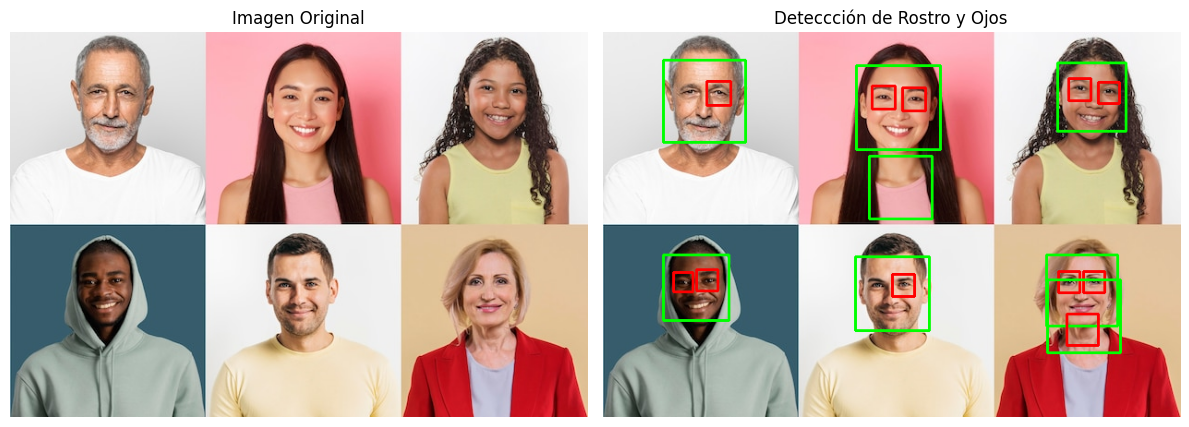

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Deteccción de Rostro y Ojos')
plt.imshow(result_image)
plt.axis('off')

plt.tight_layout()
plt.show()


In [1]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np

# Cargar clasificadores Haar
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Función para capturar una imagen desde la cámara de Colab
def take_photo():
    js = Javascript('''
    async function takePhoto() {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = '📸 Capturar';
        div.appendChild(capture);
        document.body.appendChild(div);

        const video = document.createElement('video');
        video.style.display = 'block';
        document.body.appendChild(video);

        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        video.srcObject = stream;
        await video.play();

        // Esperar al clic
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);

        stream.getTracks().forEach(t => t.stop());
        video.remove();
        div.remove();

        const data = canvas.toDataURL('image/png');
        return data;
    }
    ''')
    display(js)
    data = eval_js('takePhoto()')
    binary = b64decode(data.split(',')[1])
    return np.frombuffer(binary, dtype=np.uint8)

# Capturar imagen
image_bytes = take_photo()
image = cv2.imdecode(image_bytes, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detectar rostros
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 5)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 2)

# Mostrar resultado
from google.colab.patches import cv2_imshow
cv2_imshow(image)


<IPython.core.display.Javascript object>

MessageError: NotAllowedError: Permission denied